<a href="https://colab.research.google.com/github/emadeldinadel2022/EmotionRecognitionText/blob/emad/emotion_recognition_with_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import seaborn as sns

In [3]:
#reading and combine datasets
ds1 = pd.read_csv('/content/sample_data/tweet_emotions.csv')

In [ ]:
ds1

In [ ]:
ds1.sentiment.value_counts()

In [6]:
ds2 = pd.read_csv('/content/sample_data/raw_csv.txt')

In [ ]:
ds2

In [ ]:
ds2.Emotion.value_counts()

In [13]:
ds3 = pd.read_csv('/content/sample_data/raw1.txt')
ds4 = pd.read_csv('/content/sample_data/raw2.txt')
ds5 = pd.read_csv('/content/sample_data/raw3.txt')

In [22]:
ds3 = ds3['text'].str.split(';', 1, expand = True)

In [ ]:
ds3[1].value_counts()

In [32]:
ds4 = ds4['text'].str.split(';', 1, expand = True)
ds5 = ds5['text'].str.split(';', 1, expand = True)

In [ ]:
ds4[1].value_counts()

In [ ]:
ds5[1].value_counts()

In [ ]:
ds2.isna().sum()

In [43]:
ds2['Clean_Text'].fillna(ds2['Text'], inplace = True)

In [ ]:
ds2.isna().sum()

In [50]:
unclean_text = ds2['Text']
ds2 = ds2.drop('Text', axis = 1)

In [56]:
ds2 = ds2.drop('Unnamed: 0', axis = 1)

In [ ]:
ds2

In [ ]:
unclean_text

In [63]:
ds2.rename({'Clean_Text' : 'Text'}, axis = 1, inplace = True)

In [ ]:
ds2

In [67]:
ds1.rename({'sentiment' : 'Emotion', 'content' : 'Text'}, axis = 1, inplace = True)

In [69]:
tweet_id = ds1['tweet_id']
ds1 = ds1.drop('tweet_id', axis = 1)

In [ ]:
ds1

In [72]:
dsc = pd.concat([ds3, ds4, ds5], axis = 0)

In [77]:
dsc.rename({0 : 'Text',1 : 'Emotion'}, axis = 1, inplace = True)

In [78]:
dsc

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [79]:
dataset = pd.concat([ds1, ds2, dsc], axis = 0)

In [83]:
dataset.to_pickle('dataset.pickle')

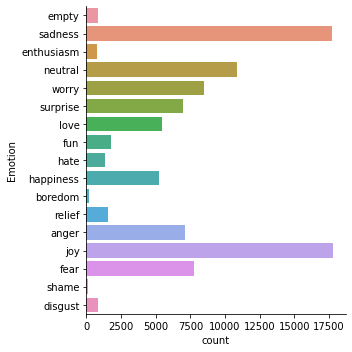

In [91]:
sns.catplot(data=dataset, y="Emotion", kind = "count")